<a href="https://colab.research.google.com/github/Clarice-C/5291final/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

boeing_df = pd.read_csv("boeing_stock_2010_2025.csv")
core_df = pd.read_csv("df_cleaned2.csv")
airbus_df = pd.read_csv("AIR.PA.csv")





In [54]:
print(core_df.shape)

(25125, 19)


In [55]:
core_df.head()

,EventType,EventDate,City,State,Country,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Latitude,Longitude,Make,Model,AirportID,Scheduled,AirCraftDamage,WeatherCondition,PurposeOfFlight,FAR
0,ACC,2025-04-22T13:25:00Z,Fayetteville,Arkansas,United States,NaN,0,0,0,36.005083,-94.170056,CESSNA,T210N,UNK,UNK,UNK,UNK,UNK,UNK
1,INC,2025-04-22T04:00:00Z,Budapest,NaN,Hungary,NaN,0,0,0,47.467000,18.950000,BOEING,737,UNK,UNK,UNK,UNK,UNK,UNK
2,ACC,2025-04-20T04:00:00Z,Tulsa,Oklahoma,United States,NaN,0,0,0,36.198393,-95.888105,BOEING,737-7H4,UNK,SCHD,UNK,UNK,UNK,121
3,ACC,2025-04-19T11:42:00Z,Hood River,Oregon,United States,NaN,0,0,0,45.674118,-121.522710,SCHWEIZER,SGS 2-33A,4S2,UNK,Substantial,VMC,INST,91
4,ACC,2025-04-19T11:06:00Z,Phoenix,Arizona,United States,NaN,0,0,0,33.688306,-112.082550,CHAPIN WALLACE HADLEY,SENIOR AERO SPORT,UNK,UNK,UNK,UNK,UNK,UNK


In [56]:
airbus_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
4167,2025/4/14,139.300003,139.839996,137.320007,139.259995,137.218964,1621814,NaN,NaN
4168,2025/4/15,139.000000,141.520004,138.479996,140.940002,138.874344,1815889,NaN,NaN
4169,2025/4/16,140.179993,140.520004,138.559998,140.500000,138.440796,1490715,NaN,NaN
4170,2025/4/17,140.639999,140.860001,135.380005,136.460007,134.460007,1563744,NaN,NaN
4171,2025/4/22,133.820007,133.820007,131.899994,133.059998,133.059998,1951154,2.0,NaN


In [57]:
boeing_df.tail()

,Price,Close,High,Low,Open,Volume
3771,2024-12-24,179.33999633789062,180.9499969482422,177.5,177.69000244140625,4317000
3772,2024-12-26,180.3800048828125,182.57000732421875,178.3300018310547,178.97999572753906,5905700
3773,2024-12-27,180.72000122070312,181.42999267578125,179.39999389648438,180.00999450683594,6806900
3774,2024-12-30,176.5500030517578,178.1699981689453,170.14999389648438,173.72000122070312,18082300
3775,2024-12-31,177.0,179.35000610351562,175.82000732421875,177.5399932861328,9748600


In [58]:
boeing_df_cleaned = boeing_df.iloc[2:].copy()

# Rename columns using the actual column names from the second row
boeing_df_cleaned.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert data types
boeing_df_cleaned['Date'] = pd.to_datetime(boeing_df_cleaned['Date'])
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
boeing_df_cleaned[numeric_cols] = boeing_df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Reset index and reorder columns
boeing_df_cleaned.reset_index(drop=True, inplace=True)
boeing_df_cleaned = boeing_df_cleaned[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [59]:
boeing_df_cleaned.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,43.419098,43.941185,42.702198,43.777546,6186700
1,2010-01-05,43.832099,45.413950,43.637290,45.211349,8867800
2,2010-01-06,45.374985,46.746444,45.102253,46.582802,8836500
3,2010-01-07,46.372405,48.554272,45.990581,48.468555,14379100
4,2010-01-08,47.954262,48.141278,47.424381,48.001015,7146600


In [60]:
airbus_df.drop(columns=["Dividends", "Stock Splits"], inplace=True)

In [61]:
airbus_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009/1/2,12.100,12.630,11.860,12.630,9.872783,1702735
1,2009/1/5,12.700,13.440,12.695,13.440,10.505952,2628493
2,2009/1/6,13.445,13.925,13.430,13.780,10.771729,2797192
3,2009/1/7,13.655,13.800,13.320,13.605,10.634932,2319050
4,2009/1/8,13.360,13.490,13.100,13.420,10.490321,2219720


In [62]:
airbus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4172 non-null   object 
 1   Open       4172 non-null   float64
 2   High       4172 non-null   float64
 3   Low        4172 non-null   float64
 4   Close      4172 non-null   float64
 5   Adj Close  4172 non-null   float64
 6   Volume     4172 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 228.3+ KB


# Descriptive statistics

In [63]:
print(core_df[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum())

FatalInjuryCount      13617
SeriousInjuryCount     4966
MinorInjuryCount       7426
dtype: int64


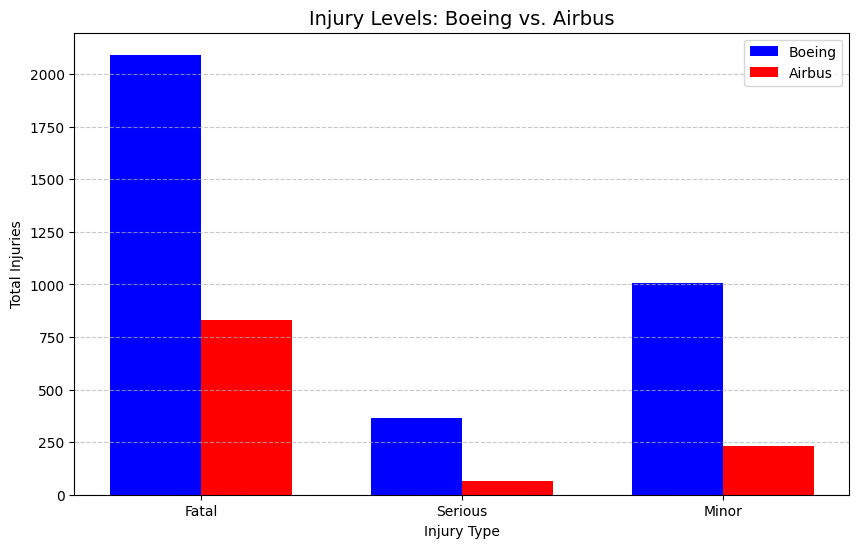

In [100]:
boeing_airbus_df = core_df[core_df['Make'].isin(["BOEING", "AIRBUS"])]
injury_data = boeing_airbus_df.groupby('Make')[['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']].sum().T


labels = ['Fatal', 'Serious', 'Minor']
boeing = injury_data['BOEING'].values
airbus = injury_data['AIRBUS'].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, boeing, width, label='Boeing', color='blue')
rects2 = ax.bar(x + width/2, airbus, width, label='Airbus', color='red')

ax.set_title('Injury Levels: Boeing vs. Airbus', fontsize=14)
ax.set_xlabel('Injury Type')
ax.set_ylabel('Total Injuries')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)


In [113]:
injury_data

Make,AIRBUS,BOEING
FatalInjuryCount,830,2092
SeriousInjuryCount,64,367
MinorInjuryCount,232,1005


In [112]:
eventtype_data = boeing_airbus_df.groupby(['EventType','Make']).size().unstack()
eventtype_data

Make,AIRBUS,BOEING
EventType,,
ACC,93,490
INC,195,793
OCC,2,42


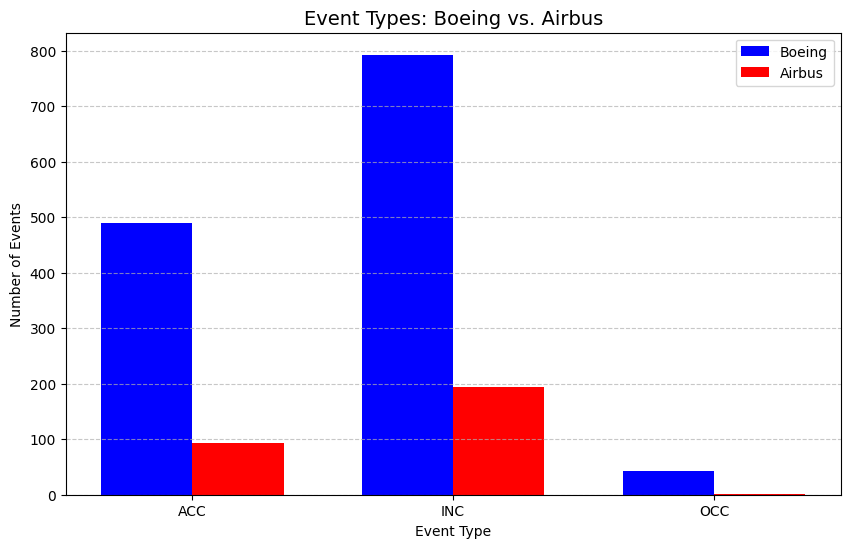

In [111]:
labels = eventtype_data.index.tolist()  # ['ACC', 'INC', 'OCC']
boeing = eventtype_data['BOEING'].values
airbus = eventtype_data['AIRBUS'].values


x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 0.35/2, boeing, 0.35, label='Boeing', color='blue')  # Boeing blue
rects2 = ax.bar(x + 0.35/2, airbus, 0.35, label='Airbus', color='red')   # Airbus red

ax.set_title('Event Types: Boeing vs. Airbus', fontsize=14)
ax.set_xlabel('Event Type')
ax.set_ylabel('Number of Events')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)



In [66]:
core_df["EventType"].value_counts()

,count
EventType,
ACC,23221
INC,1832
OCC,72


In [114]:
s_boeing = core_df[core_df['Make'].isin(["BOEING"])]
s_airbus = core_df[core_df['Make'].isin(["AIRBUS"])]

In [117]:
print(s_boeing.shape)
print(s_airbus.shape)

(1325, 19)
(290, 19)


In [118]:
s_boeing['FatalInjuryCount'].max()

298

In [120]:
s_airbus['FatalInjuryCount'].max()

224

In [122]:
s_boeing["AirCraftDamage"].value_counts()

,count
AirCraftDamage,
UNK,697
Minor,306
Substantial,256
Unknown,35
Destroyed,31


In [67]:
core_df["Make"].value_counts().head(10)

,count
Make,
CESSNA,5059
PIPER,2948
BOEING,1325
BEECH,1073
Cessna,772
BELL,598
Piper,474
ROBINSON,311
AIRBUS,290


In [68]:
core_df["Country"].value_counts()

,count
Country,
United States,20298
Brazil,416
United Kingdom,300
Australia,288
Mexico,248
...,...
Trinidad And Tobago,1
Antarctica,1
Mozambique,1


In [69]:
boeing_df_cleaned.describe()

,Date,Open,High,Low,Close,Volume
count,3774,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,2017-07-01 21:42:38.346582016,165.860956,167.862755,163.821242,165.827270,7.428269e+06
min,2010-01-04 00:00:00,43.419098,43.941185,42.702198,43.777546,7.889000e+05
25%,2013-10-02 06:00:00,99.808954,101.372804,98.477457,100.061373,3.552025e+06
50%,2017-07-01 12:00:00,146.351246,147.990609,143.721105,146.028252,4.871950e+06
75%,2021-03-31 18:00:00,215.157501,218.492504,212.015003,215.322498,7.683875e+06
max,2024-12-31 00:00:00,435.563760,435.563760,429.880066,430.299988,1.032128e+08
std,NaN,93.194700,94.300487,92.050945,93.182577,8.556516e+06


In [70]:
airbus_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4.172000e+03
mean,72.992140,73.839133,72.123342,72.998154,67.885977,2.026859e+06
std,43.208747,43.591610,42.804216,43.202422,43.211042,1.355432e+06
min,8.580000,8.790000,8.117000,8.470000,6.620939,0.000000e+00
25%,34.705001,35.077499,34.333750,34.811250,29.212111,1.217331e+06
50%,63.925001,64.980003,62.955000,63.924999,57.842894,1.738750e+06
75%,110.529997,111.789999,109.095001,110.485003,104.770685,2.464654e+06
max,175.000000,177.300003,171.779999,174.380005,171.824234,2.689999e+07


# Graphs

Stock price plots

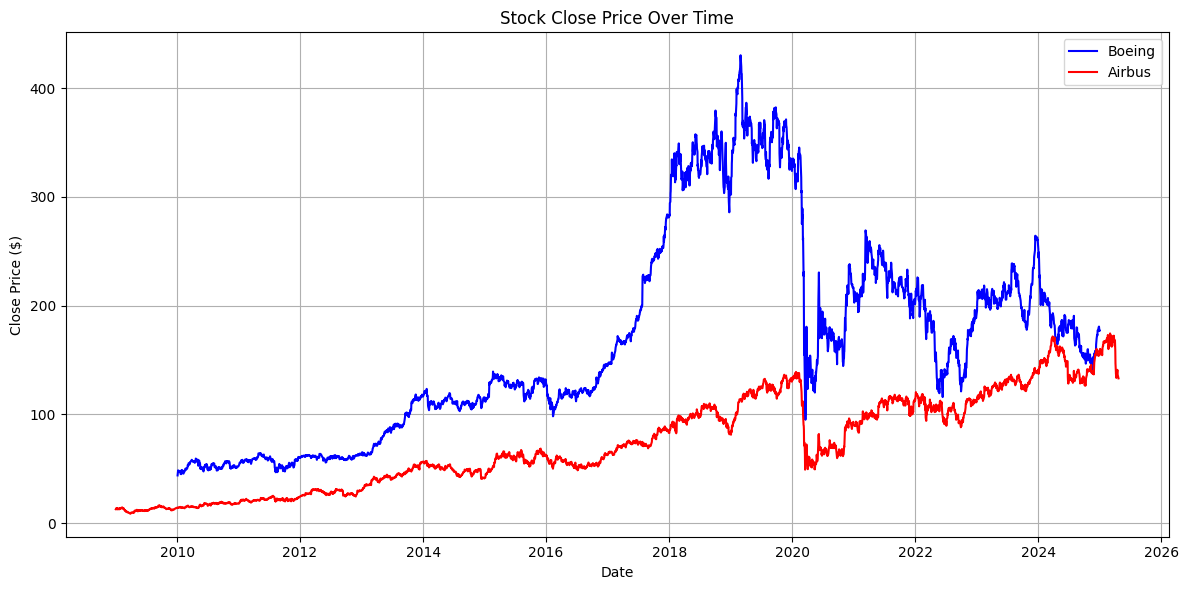

In [71]:
boeing_df_cleaned['Date'] = pd.to_datetime(boeing_df_cleaned['Date'])
airbus_df['Date'] = pd.to_datetime(airbus_df['Date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(boeing_df_cleaned['Date'], boeing_df_cleaned['Close'], label='Boeing', color='blue')
plt.plot(airbus_df['Date'], airbus_df['Close'], label='Airbus', color='red')

plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Daily returns

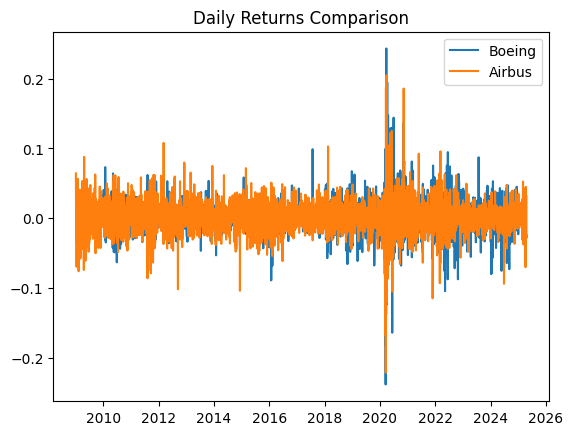

In [72]:
boeing_df_cleaned['Daily Return'] = boeing_df_cleaned['Close'].pct_change()
airbus_df['Daily Return'] = airbus_df['Close'].pct_change()

plt.plot(boeing_df_cleaned['Date'], boeing_df_cleaned['Daily Return'], label='Boeing')
plt.plot(airbus_df['Date'], airbus_df['Daily Return'], label='Airbus')
plt.title('Daily Returns Comparison')
plt.legend()

Density of accident

In [73]:
import folium
from folium.plugins import HeatMap

heat_data = core_df[["Latitude", "Longitude"]].values.tolist()
world_map = folium.Map(location=[20, 0], zoom_start=2)
HeatMap(heat_data,radius = 15).add_to(world_map)
world_map